In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np



In [2]:
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


Hidden Size: 5, Train Accuracy: 89.45333333333333, Test Accuracy: 89.19
Hidden Size: 10, Train Accuracy: 93.01666666666667, Test Accuracy: 92.54
Hidden Size: 20, Train Accuracy: 95.31666666666666, Test Accuracy: 94.79
Hidden Size: 50, Train Accuracy: 97.32833333333333, Test Accuracy: 96.81
Hidden Size: 75, Train Accuracy: 97.80833333333334, Test Accuracy: 96.8
Hidden Size: 100, Train Accuracy: 98.27, Test Accuracy: 97.32


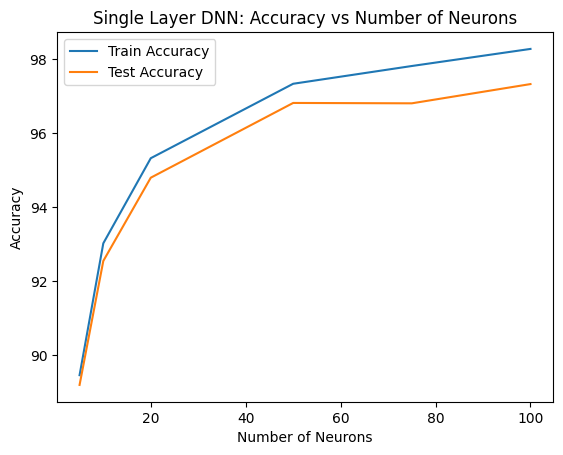

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#單層DNN
# 下載和加載MNIST數據集
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = torch.relu(out)
        out = self.fc2(out)
        return out

def train_and_evaluate(hidden_size):
    input_size = 784  # 28x28
    num_classes = 10
    num_epochs = 5
    learning_rate = 0.001
    batch_size = 64
    
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    model = SimpleDNN(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        for images, labels in trainloader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Evaluate on training data
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for images, labels in trainloader:
                images = images.view(-1, 28*28)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            train_accuracy = 100 * correct / total
            train_accuracies.append(train_accuracy)
        
        # Evaluate on test data
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(-1, 28*28)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            test_accuracy = 100 * correct / total
            test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies

hidden_sizes = [5, 10, 20, 50, 75, 100]
train_accuracies = []
test_accuracies = []

for size in hidden_sizes:
    train_acc, test_acc = train_and_evaluate(size)
    train_accuracies.append(train_acc[-1])
    test_accuracies.append(test_acc[-1])
    print(f'Hidden Size: {size}, Train Accuracy: {train_acc[-1]}, Test Accuracy: {test_acc[-1]}')

plt.plot(hidden_sizes, train_accuracies, label='Train Accuracy')
plt.plot(hidden_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Single Layer DNN: Accuracy vs Number of Neurons')
plt.legend()
plt.show()


Training Size: 1000, Train Accuracy: 89.5, Test Accuracy: 82.86
Training Size: 5000, Train Accuracy: 95.4, Test Accuracy: 91.51
Training Size: 10000, Train Accuracy: 96.89, Test Accuracy: 93.68
Training Size: 20000, Train Accuracy: 97.66, Test Accuracy: 95.59
Training Size: 30000, Train Accuracy: 98.1, Test Accuracy: 96.42
Training Size: 40000, Train Accuracy: 98.365, Test Accuracy: 96.92
Training Size: 50000, Train Accuracy: 98.544, Test Accuracy: 97.34
Training Size: 60000, Train Accuracy: 98.81333333333333, Test Accuracy: 97.41


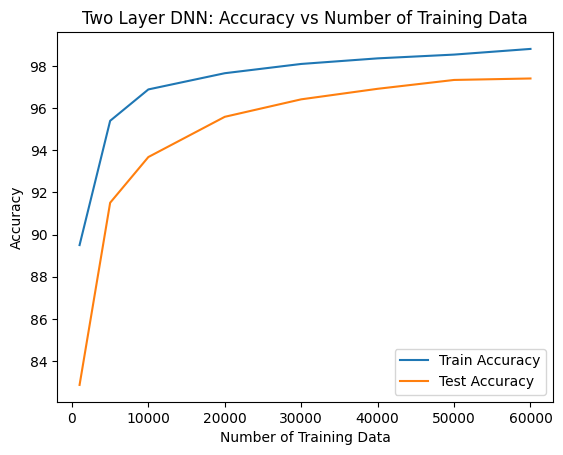

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
#雙層DNN

# 下载和加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

class TwoLayerDNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = torch.relu(out)
        out = self.fc2(out)
        out = torch.relu(out)
        out = self.fc3(out)
        return out

def train_and_evaluate_2layer(train_size):
    input_size = 784  # 28x28
    hidden_size = 100
    num_classes = 10
    num_epochs = 5
    learning_rate = 0.001
    batch_size = 64
    
    partial_trainset = torch.utils.data.Subset(trainset, np.arange(train_size))
    trainloader = torch.utils.data.DataLoader(partial_trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    model = TwoLayerDNN(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        for images, labels in trainloader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Evaluate on training data
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for images, labels in trainloader:
                images = images.view(-1, 28*28)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            train_accuracy = 100 * correct / total
            train_accuracies.append(train_accuracy)
        
        # Evaluate on test data
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(-1, 28*28)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            test_accuracy = 100 * correct / total
            test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies

train_sizes = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000]
train_accuracies = []
test_accuracies = []

for size in train_sizes:
    train_acc, test_acc = train_and_evaluate_2layer(size)
    train_accuracies.append(train_acc[-1])
    test_accuracies.append(test_acc[-1])
    print(f'Training Size: {size}, Train Accuracy: {train_acc[-1]}, Test Accuracy: {test_acc[-1]}')

plt.plot(train_sizes, train_accuracies, label='Train Accuracy')
plt.plot(train_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Training Data')
plt.ylabel('Accuracy')
plt.title('Two Layer DNN: Accuracy vs Number of Training Data')
plt.legend()
plt.show()


Number of Layers: 1, Accuracy: 97.14
Number of Layers: 2, Accuracy: 97.46
Number of Layers: 3, Accuracy: 96.99
Number of Layers: 4, Accuracy: 97.4
Number of Layers: 5, Accuracy: 96.89


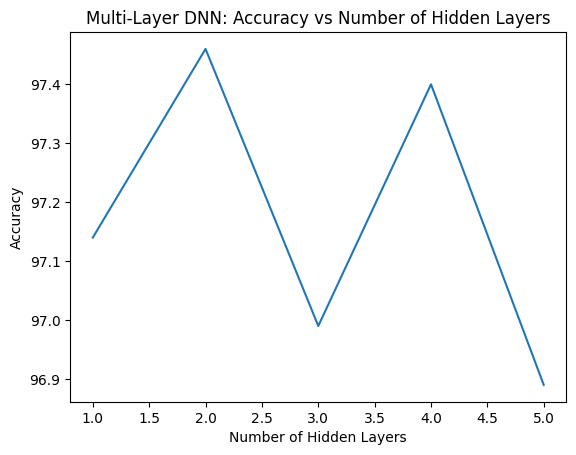

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#多層DNN

# 下載和加載MNIST數據集
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

class MultiLayerDNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers):
        super(MultiLayerDNN, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        self.output_layer = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

def train_and_evaluate_multilayer(num_layers):
    input_size = 784  # 28x28
    hidden_size = 100
    num_classes = 10
    num_epochs = 5
    learning_rate = 0.001
    batch_size = 64
    
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    model = MultiLayerDNN(input_size, hidden_size, num_classes, num_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        for images, labels in trainloader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testloader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        return accuracy

num_layers_list = [1, 2, 3, 4, 5]
accuracies = []

for num_layers in num_layers_list:
    acc = train_and_evaluate_multilayer(num_layers)
    accuracies.append(acc)
    print(f'Number of Layers: {num_layers}, Accuracy: {acc}')

plt.plot(num_layers_list, accuracies)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Multi-Layer DNN: Accuracy vs Number of Hidden Layers')
plt.show()


Number of Layers: 1, Training Accuracy: 97.12166666666667, Testing Accuracy: 96.9
Number of Layers: 2, Training Accuracy: 97.845, Testing Accuracy: 97.41
Number of Layers: 3, Training Accuracy: 97.815, Testing Accuracy: 97.24
Number of Layers: 4, Training Accuracy: 97.64, Testing Accuracy: 97.19
Number of Layers: 5, Training Accuracy: 97.42666666666666, Testing Accuracy: 97.08


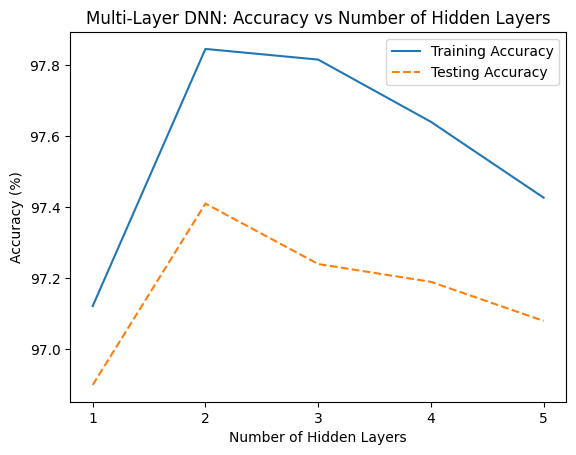

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the transformation and load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

class MultiLayerDNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers):
        super(MultiLayerDNN, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        self.output_layer = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

def train_and_evaluate_multilayer(num_layers):
    input_size = 784  # 28x28
    hidden_size = 100
    num_classes = 10
    num_epochs = 5
    learning_rate = 0.001
    batch_size = 128
    
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    model = MultiLayerDNN(input_size, hidden_size, num_classes, num_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    training_accuracies = []
    testing_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        correct = 0
        total = 0
        for images, labels in trainloader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        training_accuracy = 100 * correct / total
        training_accuracies.append(training_accuracy)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testloader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        testing_accuracy = 100 * correct / total
        testing_accuracies.append(testing_accuracy)

    return training_accuracies[-1], testing_accuracies[-1]

num_layers_list = [1, 2, 3, 4, 5]
train_accuracies = []
test_accuracies = []

for num_layers in num_layers_list:
    train_acc, test_acc = train_and_evaluate_multilayer(num_layers)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f'Number of Layers: {num_layers}, Training Accuracy: {train_acc}, Testing Accuracy: {test_acc}')

plt.plot(num_layers_list, train_accuracies, label='Training Accuracy')
plt.plot(num_layers_list, test_accuracies, label='Testing Accuracy', linestyle='--')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy (%)')
plt.title('Multi-Layer DNN: Accuracy vs Number of Hidden Layers')
plt.xticks(num_layers_list)  # Set x-ticks to show each integer value
plt.legend()
plt.show()


Epoch 1, Loss: 1.0291050871213276
Epoch 2, Loss: 0.5063571972506387
Epoch 3, Loss: 0.26765363982745577
Epoch 4, Loss: 0.19606147777466548
Epoch 5, Loss: 0.18014433128493174
Epoch 6, Loss: 0.17518505152492297
Epoch 7, Loss: 0.17372181656814756
Epoch 8, Loss: 0.16797925957611629
Epoch 9, Loss: 0.17157413863709994
Epoch 10, Loss: 0.16973500166620528
Epoch 11, Loss: 0.16312518644900548
Epoch 12, Loss: 0.15913143079905284
Epoch 13, Loss: 0.1591240144556477
Epoch 14, Loss: 0.15869909791009768
Epoch 15, Loss: 0.1592861839703151
Epoch 16, Loss: 0.1611131009246622
Epoch 17, Loss: 0.1823810865836484
Epoch 18, Loss: 0.15988278601850783
Epoch 19, Loss: 0.16524997708343325
Epoch 20, Loss: 0.1573857544433503
Epoch 21, Loss: 0.15635941310652665
Epoch 22, Loss: 0.16968681379443123
Epoch 23, Loss: 0.15744741074740887
Epoch 24, Loss: 0.1546421235515958
Epoch 25, Loss: 0.16664033631483713
Training Accuracy: 0.9476923076923077
Testing Accuracy: 0.9133333333333333
Training Confusion Matrix:
 [[287   6   7 

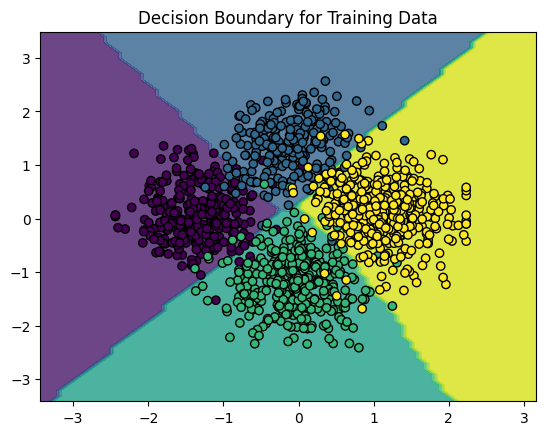

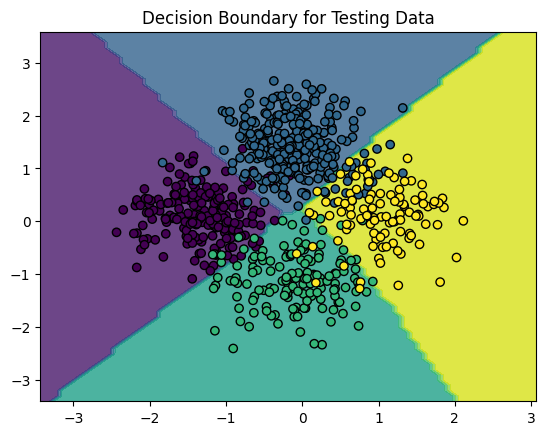

In [43]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Load data
train_data = pd.read_csv('HW2_training.csv')
test_data = pd.read_csv('HW2_testing.csv')

# Separate features and target
X_train = train_data[['Offensive', 'Defensive']].values
y_train = train_data['Team'].values
X_test = test_data[['Offensive', 'Defensive']].values
y_test = test_data['Team'].values

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the neural network
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(2, 128)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 4)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# Initialize the model, loss function, and optimizer
model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(model, criterion, optimizer, train_loader, num_epochs=25):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')

# Evaluate the model
def evaluate_model(model, loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    return accuracy, confusion

# Train and evaluate
train_model(model, criterion, optimizer, train_loader, num_epochs=25)
train_accuracy, train_confusion = evaluate_model(model, train_loader)
test_accuracy, test_confusion = evaluate_model(model, test_loader)

# Print accuracy and confusion matrix
print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)
print('Training Confusion Matrix:\n', train_confusion)
print('Testing Confusion Matrix:\n', test_confusion)

# Plotting decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    _, Z = torch.max(Z.data, 1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

# Plot decision boundaries for training and testing data
plot_decision_boundaries(X_train, y_train, model, "Decision Boundary for Training Data")
plot_decision_boundaries(X_test, y_test, model, "Decision Boundary for Testing Data")
